In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time
import os
import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new

from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
#from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles, plot_ptiles_comp
from viz.fit import plot_all_losses
import matplotlib.pyplot as plt
import yaml

In [3]:
from os.path import exists, join, splitext

In [4]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)

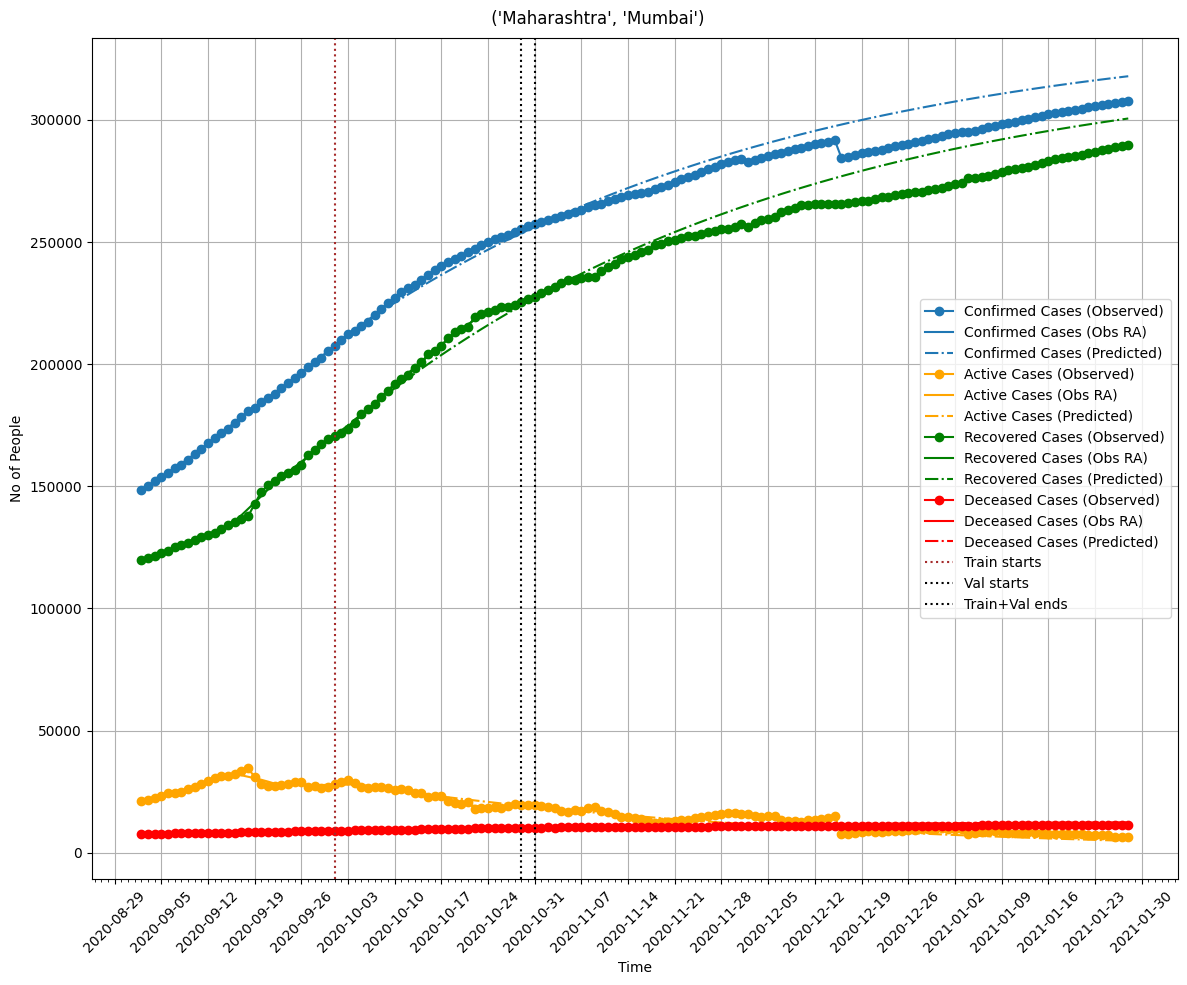

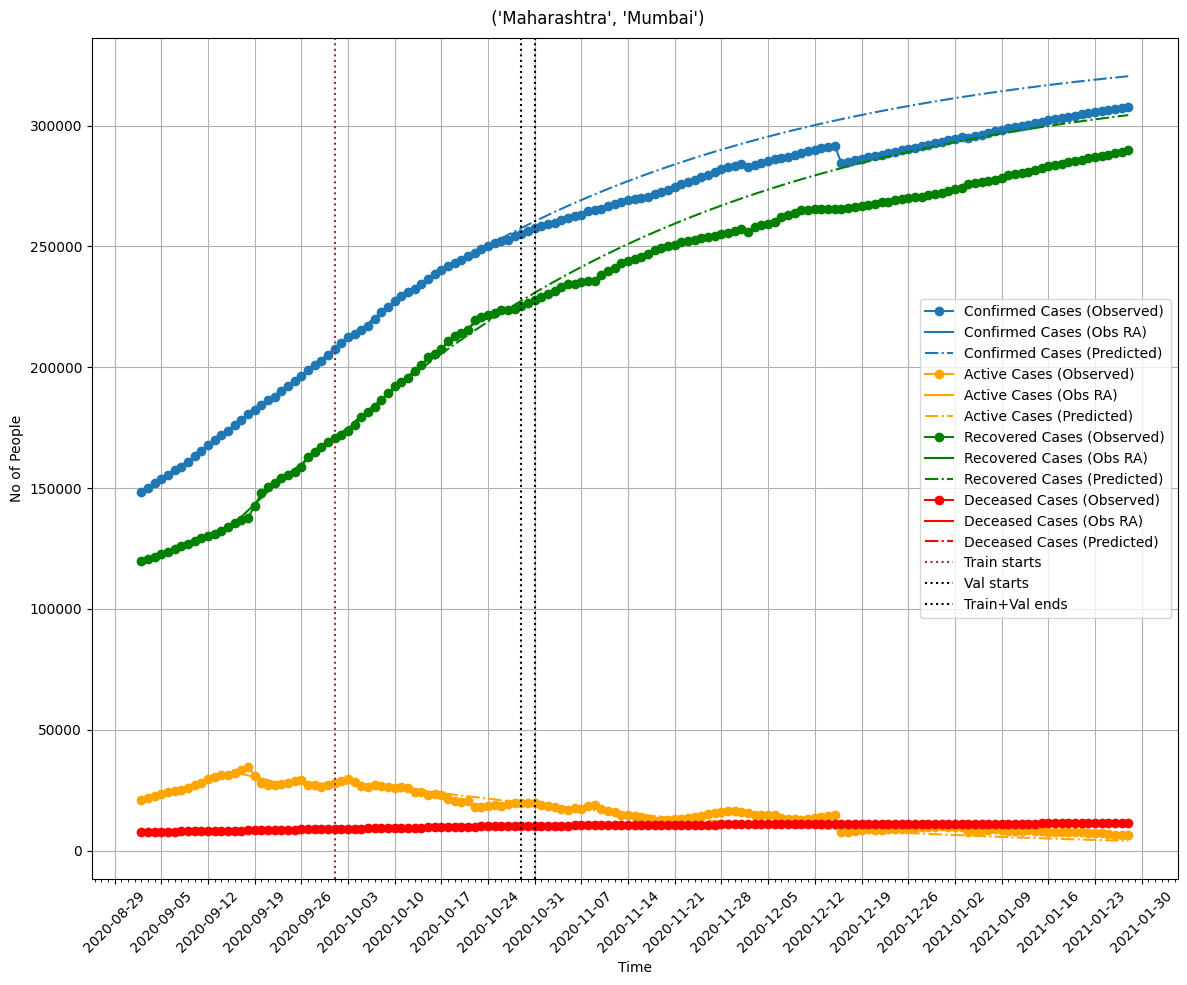

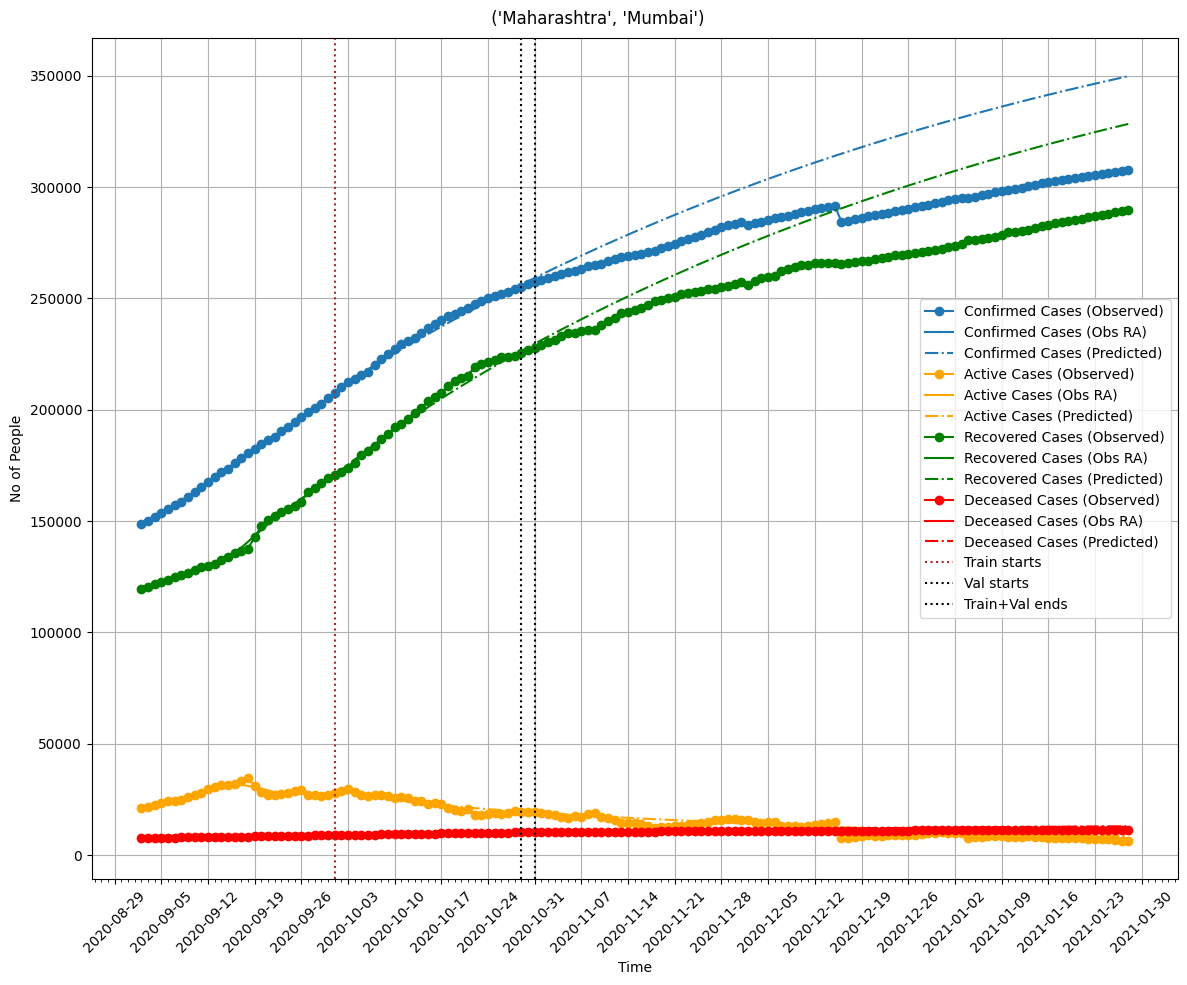

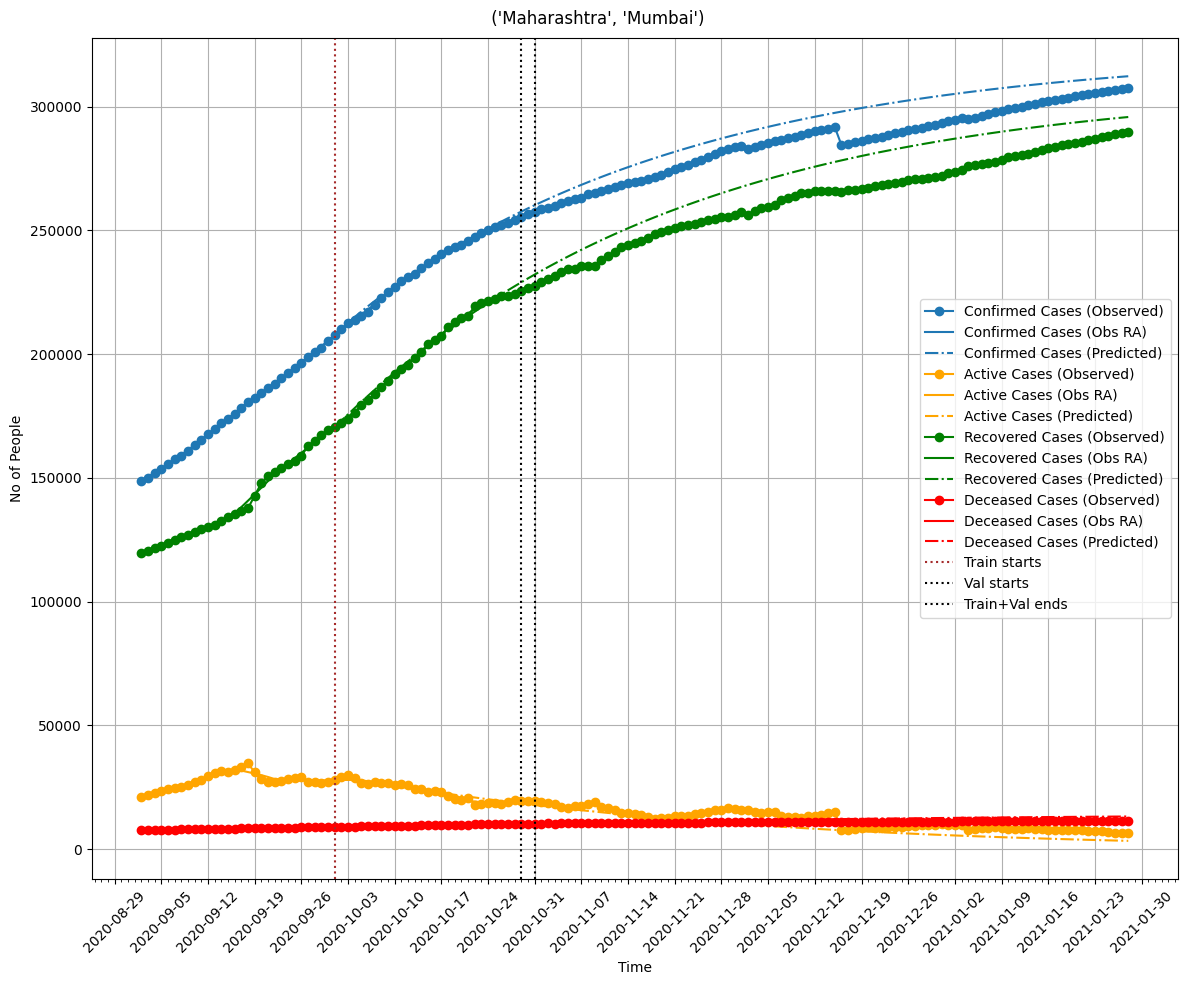

In [5]:
import pickle as pkl
with open('../../misc/predictions/test_mumbai_logdiff.pickle', 'rb') as handle:
    PD = pkl.load(handle)

In [6]:
predictions_dict_b = PD['m0']['BO']

In [7]:
predictions_dict_m = PD['m0']['MCMC']

In [8]:
predictions_dict_m['m1']['forecasts'] = {}        
predictions_dict_m['m1']['forecasts']['best'] = get_forecast(predictions_dict_m, train_fit='m1', 
                                                                model=config2['fitting']['model'], 
                                                                forecast_days=config2['forecast']['forecast_days'])

getting forecasts ..


In [9]:
predictions_dict_b['m1']['forecasts'] = {}
predictions_dict_b['m1']['forecasts']['best'] = get_forecast(predictions_dict_b, train_fit='m1', 
                                                                model=config1['fitting']['model'], 
                                                                forecast_days=config1['forecast']['forecast_days'])

getting forecasts ..


In [10]:
predictions_dict_m['m1']['trials_processed'] = forecast_all_trials(predictions_dict_m, train_fit='m1', 
                                                                        model=config2['fitting']['model'], 
                                                                        forecast_days=config2['forecast']['forecast_days'])

11it [00:00, 102.07it/s]

getting forecasts ..


2000it [00:18, 107.66it/s]


In [11]:
predictions_dict_b['m1']['trials_processed'] = forecast_all_trials(predictions_dict_b, train_fit='m1', 
                                                                        model=config2['fitting']['model'], 
                                                                        forecast_days=config2['forecast']['forecast_days'])

13it [00:00, 123.12it/s]

getting forecasts ..


2000it [00:22, 89.94it/s] 


In [12]:
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}

# Total

In [13]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']


<Columns.total: Column(name='total', label='Confirmed Cases', color='C0')>

In [14]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
print('BO')
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_t= {}
PD_t['MCMC'] = predictions_dict_m.copy()
PD_t['BO'] = predictions_dict_b.copy()
import pickle as pkl
with open('../../misc/predictions/mcmc_total_l.pickle', 'wb') as handle:
    pkl.dump(PD_t, handle)

24it [00:00, 118.73it/s]

getting forecasts ..


2000it [00:17, 117.20it/s]
13it [00:00, 125.63it/s]

BO
getting forecasts ..


2000it [00:18, 107.07it/s]
100%|██████████| 101/101 [02:32<00:00,  1.51s/it]


Best beta - 50.0
Min Loss - 0.003746718597623776


# Active

In [16]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']

<Columns.active: Column(name='active', label='Active Cases', color='orange')>

In [17]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_a= {}
PD_a['MCMC'] = predictions_dict_m.copy()
PD_a['BO'] = predictions_dict_b.copy()
import pickle as pkl
with open('../../misc/predictions/mcmc_active_l.pickle', 'wb') as handle:
    pkl.dump(PD_a, handle)

13it [00:00, 128.05it/s]

getting forecasts ..


2000it [00:16, 121.97it/s]
32it [00:00, 158.42it/s]

getting forecasts ..


2000it [00:13, 143.33it/s]
100%|██████████| 101/101 [02:32<00:00,  1.51s/it]


Best beta - 50.0
Min Loss - 0.003746718597623776


# Recovered

In [18]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']


<Columns.recovered: Column(name='recovered', label='Recovered', color='green')>

In [19]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_r= {}
PD_r['MCMC'] = predictions_dict_m.copy()
PD_r['BO'] = predictions_dict_b.copy()
with open('../../misc/predictions/mcmc_recovered_l.pickle', 'wb') as handle:
    pkl.dump(PD_r, handle)

13it [00:00, 124.10it/s]

getting forecasts ..


2000it [00:14, 135.50it/s]
14it [00:00, 136.17it/s]

getting forecasts ..


2000it [00:14, 134.34it/s]
100%|██████████| 101/101 [02:41<00:00,  1.60s/it]


Best beta - 50.0
Min Loss - 0.003746718597623776


# Deceased

In [20]:
config_filename1 = 'default.yaml'
config_filename2 = 'uncer.yaml'
config1 = read_config(config_filename1)
config2 = read_config(config_filename2)
uncertainty_args_m = {'predictions_dict': predictions_dict_m, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
uncertainty_args_b = {'predictions_dict': predictions_dict_b, 'fitting_config': config1['fitting'],
                    'forecast_config': config1['forecast'], **config1['uncertainty']['uncertainty_params']}
config1['uncertainty']['uncertainty_params']['sort_trials_by_column']

<Columns.deceased: Column(name='deceased', label='Deceased', color='red')>

In [21]:
uncertainty_m = config2['uncertainty']['method'](**uncertainty_args_m)
predictions_dict_m['uncertainty_forecasts'] = uncertainty_m.get_forecasts()
predictions_dict_m['ensemble_mean_forecast'] = uncertainty_m.ensemble_mean_forecast
uncertainty_b = config1['uncertainty']['method'](**uncertainty_args_b)
predictions_dict_b['uncertainty_forecasts'] = uncertainty_b.get_forecasts()
predictions_dict_b['ensemble_mean_forecast'] = uncertainty_b.ensemble_mean_forecast
PD_d= {}
PD_d['MCMC'] = predictions_dict_m.copy()
PD_d['BO'] = predictions_dict_b.copy()
with open('../../misc/predictions/mcmc_deceased_l.pickle', 'wb') as handle:
    pkl.dump(PD_d, handle)

13it [00:00, 124.28it/s]

getting forecasts ..


2000it [00:17, 116.93it/s]
10it [00:00, 91.81it/s]

getting forecasts ..


2000it [00:16, 120.31it/s]
100%|██████████| 101/101 [02:29<00:00,  1.48s/it]


Best beta - 50.0
Min Loss - 0.003746718597623776


In [22]:
plt.rcParams.update({
    'text.usetex': True,
    'font.size': 15,
    'font.family': 'Palatino',
})

In [25]:
import pickle as pkl
with open('../../misc/predictions/mcmc_total.pickle', 'rb') as handle:
    PD_t = pkl.load(handle)
with open('../../misc/predictions/mcmc_active.pickle', 'rb') as handle:
    PD_a = pkl.load(handle)
with open('../../misc/predictions/mcmc_recovered.pickle', 'rb') as handle:
    PD_r = pkl.load(handle)
with open('../../misc/predictions/mcmc_deceased.pickle', 'rb') as handle:
    PD_d = pkl.load(handle)

total
active
recovered
deceased


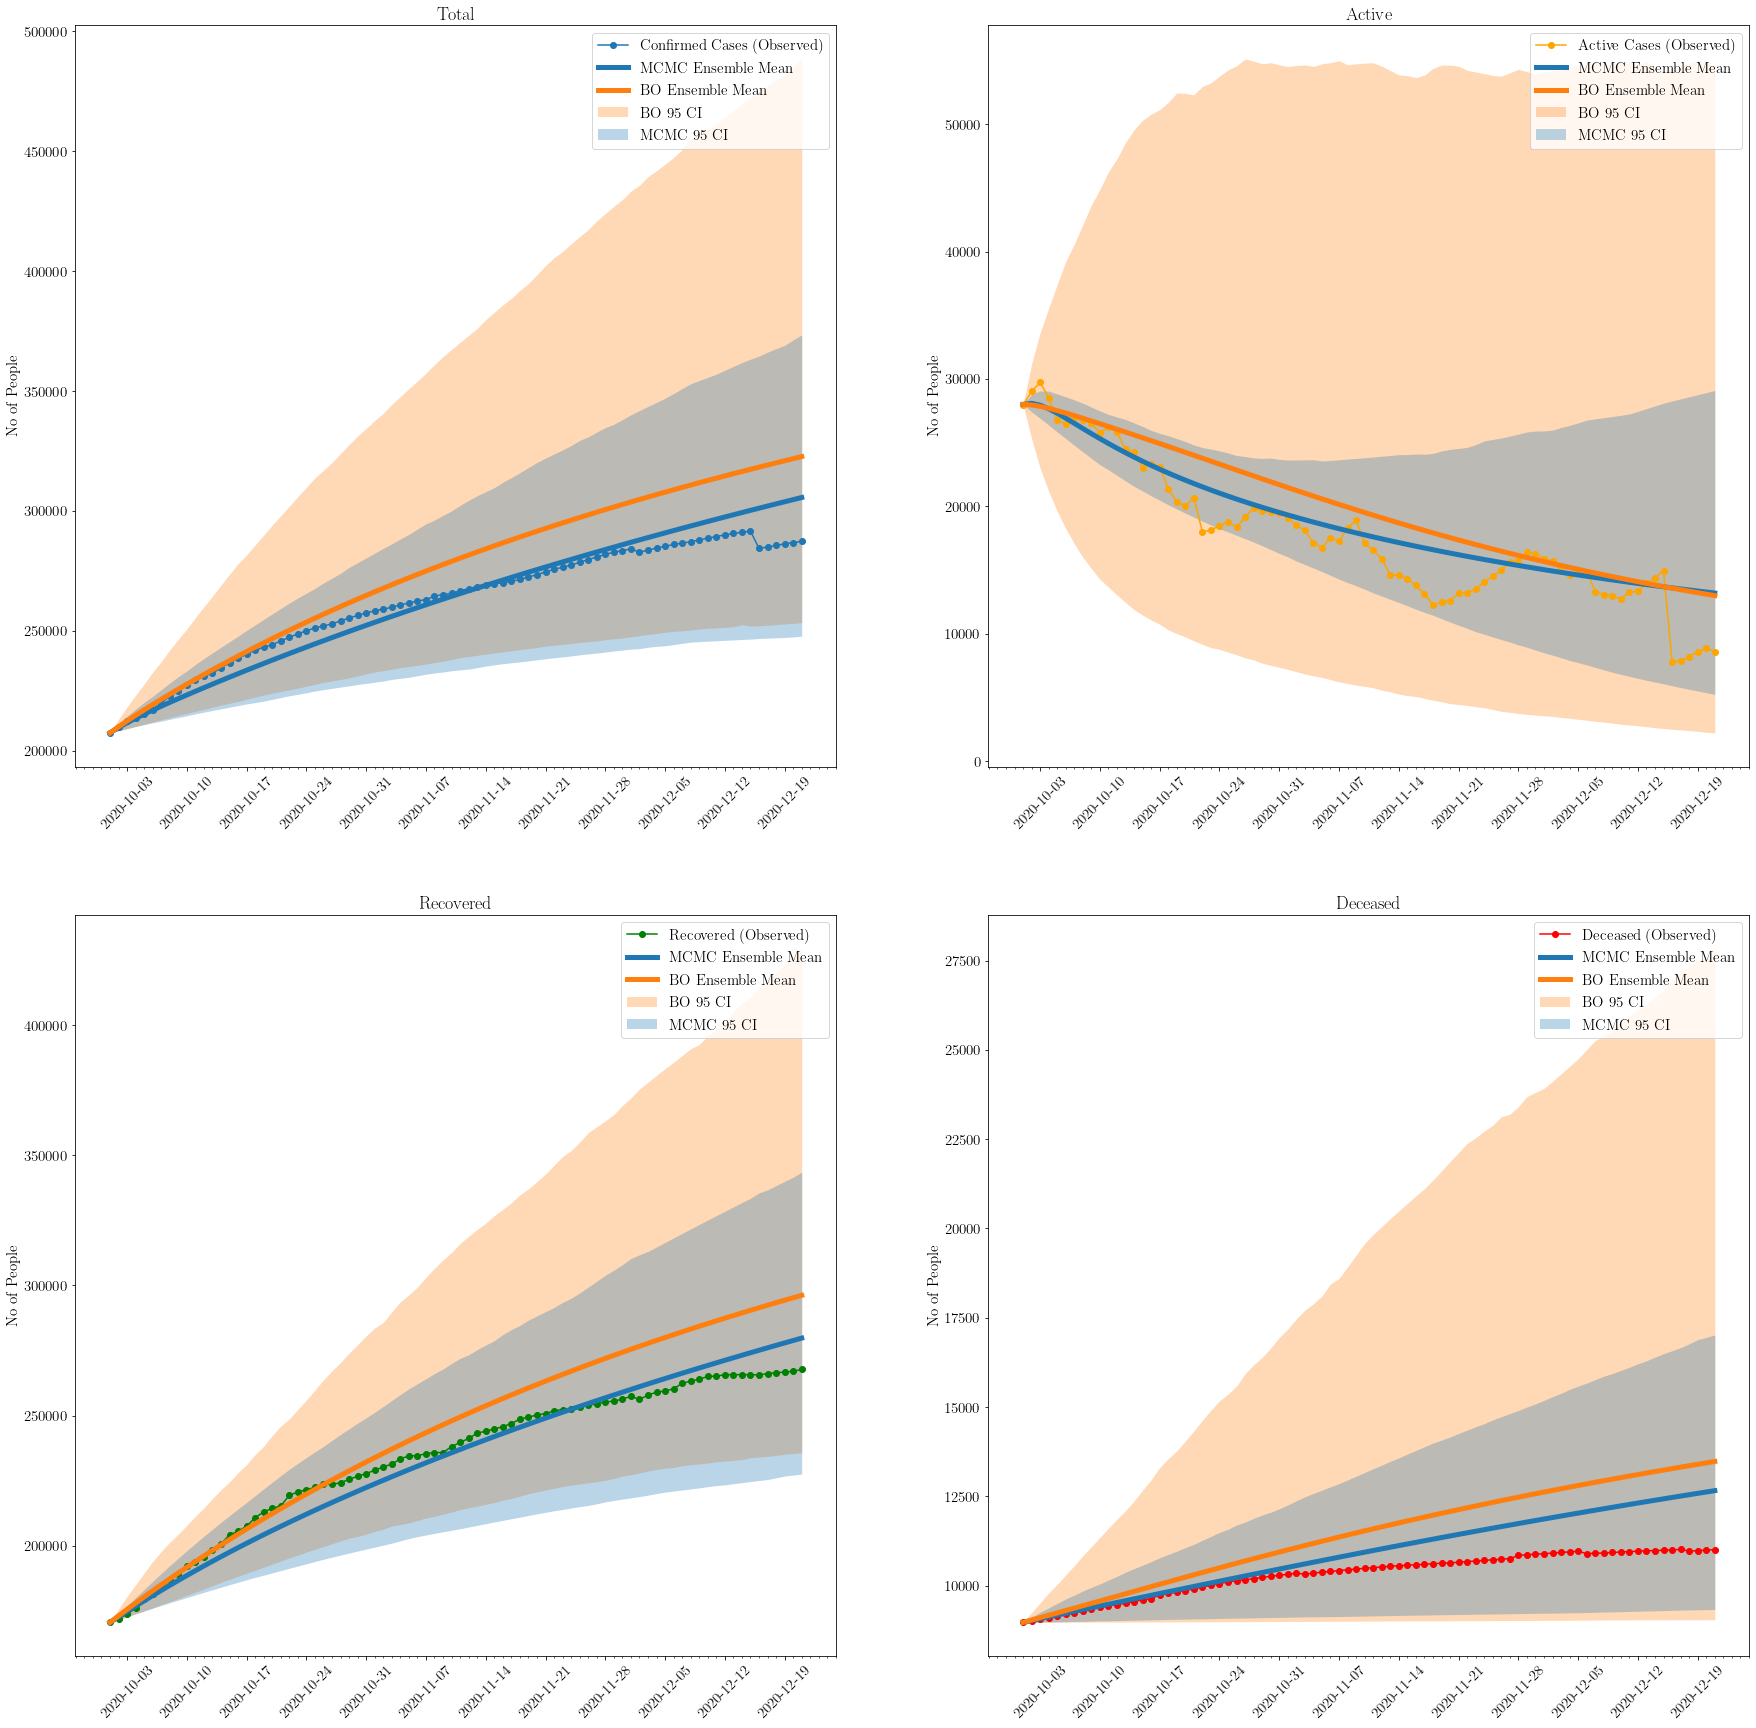

In [24]:
fig,axs = plt.subplots(figsize=(30,30),nrows=2,ncols=2) 
plot_ptiles_comp(PD_t, compartment=config1['forecast']['plot_ptiles_for_columns'][0],ax=axs.flat[0])
plot_ptiles_comp(PD_a, compartment=config1['forecast']['plot_ptiles_for_columns'][1],ax=axs.flat[1])
plot_ptiles_comp(PD_r, compartment=config1['forecast']['plot_ptiles_for_columns'][2],ax=axs.flat[2])
plot_ptiles_comp(PD_d, compartment=config1['forecast']['plot_ptiles_for_columns'][3],ax=axs.flat[3])
fig.savefig('/Users/avtansht/Desktop/Desktop/Wadhwani/Plots_final/CI_logg_diff.pdf',  format='pdf', bbox_inches='tight', pad_inches=0)

total
active
recovered
deceased


(None, <AxesSubplot:title={'center':'Deceased'}, ylabel='No of People'>)

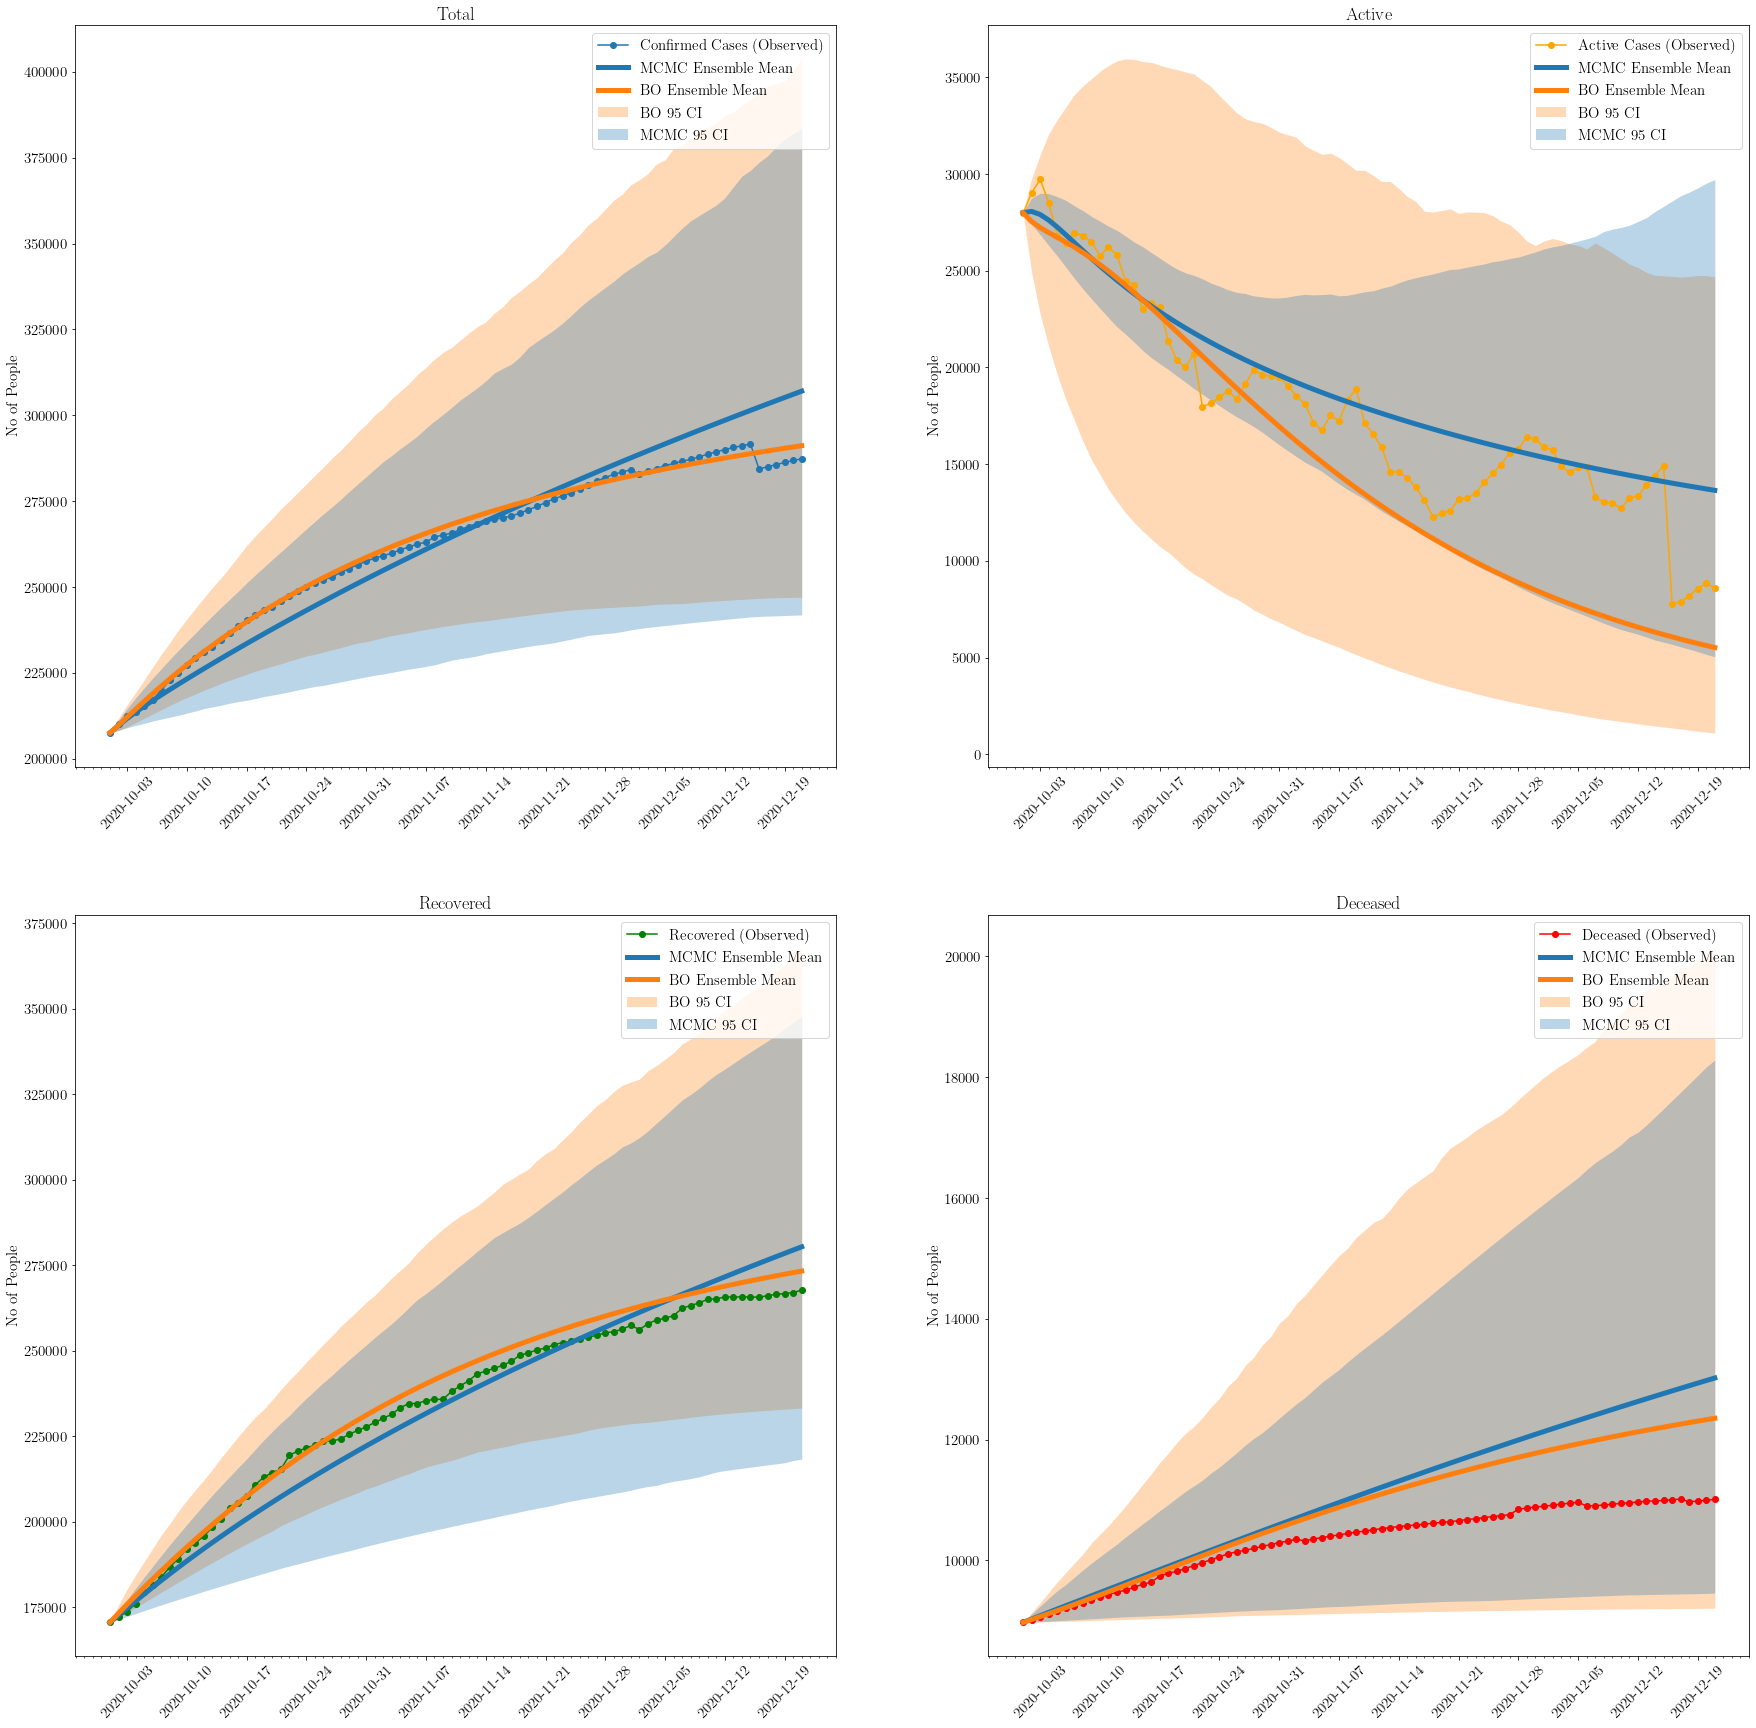

In [26]:
fig,axs = plt.subplots(figsize=(30,30),nrows=2,ncols=2) 
plot_ptiles_comp(PD_t, compartment=config1['forecast']['plot_ptiles_for_columns'][0],ax=axs.flat[0])
plot_ptiles_comp(PD_a, compartment=config1['forecast']['plot_ptiles_for_columns'][1],ax=axs.flat[1])
plot_ptiles_comp(PD_r, compartment=config1['forecast']['plot_ptiles_for_columns'][2],ax=axs.flat[2])
plot_ptiles_comp(PD_d, compartment=config1['forecast']['plot_ptiles_for_columns'][3],ax=axs.flat[3])